In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import warnings
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

В данной работе нашей целью будет решение задачи регрессии. В качестве набора данных будем использовать Laptop-price-dataset. В нем содержутся данные о моделях ноутбуков разных брендов. Наш целевой признак - стоимость ноутбука в евро.

## Подготовка данных

### Считаем данные датасета

In [47]:
data = pd.read_csv("./laptop_price.csv", index_col=0,  encoding='ISO-8859-1')
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [48]:
data.describe(include="all")

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 132.3+ KB


Уже сейчас можно заметить, что из заявленных 1320 объектов 17 куда-то потерялись, а многие выбранные типы данных плохо подходят для используемых признаков. 

In [50]:
data.reset_index(drop=True, inplace=True)

### Описание датасета

Данный датасет содержит информацию о 1303 моделях ноутбуков(laptops).

`Company` - компания-производитель ноутбука

`Product` - название модели ноутбука

`TypeName` - тип ноутбука

`Inches` - диагональ экрана в дюймах

`ScreenResolution` - разрешение экрана

`Cpu` - модель процессора, использующегося в ноутбуке

`Ram` - объем оперативной памяти

`Memory` - объем внутренней памяти и ее тип (ssd/hdd)

`Gpu` - модель видеокарты, используемой в ноутбуке

`OpSys` - тип операционной системы

`Weight` - вес ноутбука

`Price_euros` - целевой признак, официальная цена ноутбука в евро

### Предобработка признаков

In [51]:
data.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [52]:
data.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [53]:
data.OpSys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

Для этих признаков дополнительного feature engineering-а не нужно.

In [54]:
data.Product.unique()[:10]

array(['MacBook Pro', 'Macbook Air', '250 G6', 'Aspire 3',
       'ZenBook UX430UN', 'Swift 3', 'Inspiron 3567', 'MacBook 12"',
       'IdeaPad 320-15IKB', 'XPS 13'], dtype=object)

In [55]:
data[data.Product == "MacBook Pro"]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
12,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83kg,2439.97
15,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1518.55
17,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,2858.00
45,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.0GHz,8GB,256GB SSD,Intel Iris Graphics 540,macOS,1.37kg,1419.00
249,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,512GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,2040.00
270,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg,1958.90


In [56]:
data.drop(columns="Product", inplace=True)

Количество уникальных названий моделей достаточно велико, чтобы работать с ними как с категориальными признаками. При этом, их информация достаточно скудная, чтобы работать с ними как с текстом, да и наличие нескольких записей с одинаковыми названиями моделей, но разными ценами, говорит о том, что столбец с наименованием модели можно безболезнено удалить из датасета.

In [57]:
data.ScreenResolution.unique()[:10]

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800'], dtype=object)

In [58]:
data["IPS"] = data.ScreenResolution.str.contains('IPS')
data["Touchscreen"] = data.ScreenResolution.str.contains('Touchscreen')
data["ScreenResolution"] = data.ScreenResolution.str.replace(r".*\s", "", regex=True)

Среди текста, указанного в графе `ScreenResolution` стоит оставить только само разрешение пикселей, как наиболее информативный показатель. Дополнительно стоит создать 2 бинарных признака `IPS` и `Touchscreen`.

In [59]:
data.Cpu.unique()[:10]

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz'],
      dtype=object)

In [60]:
data.rename(columns={"Cpu":"CPUFrequency"}, inplace=True)
data["CPUVendor"] = pd.Series(["Intel" if "Intel" in i else "AMD" if "AMD" in i else "Samsung" for i in data.CPUFrequency])
data["CPUFrequency"] = data.CPUFrequency.str.replace(r".*\s|GHz", "", regex=True).astype("float64") 

Среди текста, указанного в графе `Cpu` стоит оставить только само значение частоты процессора, причем сделать этот признак стоит числовым. Добавим еще 1 столбец `GPUVendor`.

In [61]:
data.Memory.unique()[:10]

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD'], dtype=object)

In [62]:
data["SSD"] = data.Memory.str.contains('SSD')
data["HDD"] = data.Memory.str.contains('HDD')
data["SSHD"] = data.Memory.str.contains('Hybrid')
data["FlashStorage"] = data.Memory.str.contains('Flash Storage')
data["Memory"] = data.Memory.str.replace(r"\s+\D+", "", regex=True)
data["Memory"] = data.Memory.str.replace(".", "", regex=False)

В случае с памятью, нас интересует ее объем и тип накопителя. Создадим еще 4 бинарных столбца признаков `SSD`, `HDD`, `SSHDM` и `FlashStorage`.

In [63]:
data.Ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [64]:
data["Ram"] = data.Ram.str.replace("GB", "", regex=False).astype("float")

Объем оперативной памяти тоже сделаем числовым признаком.

In [65]:
data.Gpu.unique()[:10]

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520'], dtype=object)

In [66]:
data["GPUVendor"] = pd.Series(["Intel" if "Intel" in i else "AMD" if "AMD" in i else "Nvidia" for i in data.Gpu])
data["Gpu"] = data.Gpu.str.replace(r"^\w+\s", "", regex=True)

Для GPU создадим признак, отвечающий за производителя. Дублирование этой информации уберем из основного признака.

In [67]:
data["Weight"] = pd.Series([w[:-2] for w in data.Weight.values]).astype("float64")

Вес ноутбука логичнее считать числовым признаком.

In [68]:
category_col = data.columns.delete([2, 4, 5, 9, 10])
data[category_col] = data[category_col].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Company           1303 non-null   category
 1   TypeName          1303 non-null   category
 2   Inches            1303 non-null   float64 
 3   ScreenResolution  1303 non-null   category
 4   CPUFrequency      1303 non-null   float64 
 5   Ram               1303 non-null   float64 
 6   Memory            1303 non-null   category
 7   Gpu               1303 non-null   category
 8   OpSys             1303 non-null   category
 9   Weight            1303 non-null   float64 
 10  Price_euros       1303 non-null   float64 
 11  IPS               1303 non-null   category
 12  Touchscreen       1303 non-null   category
 13  CPUVendor         1303 non-null   category
 14  SSD               1303 non-null   category
 15  HDD               1303 non-null   category
 16  SSHD              1303 n

Изменим тип категориальных признаков на "category".

In [69]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
CPUFrequency        0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
IPS                 0
Touchscreen         0
CPUVendor           0
SSD                 0
HDD                 0
SSHD                0
FlashStorage        0
GPUVendor           0
dtype: int64

Видим, что пропущенных значений в датасете нет.

### Визуализация данных

Начнем с числовых признаков

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


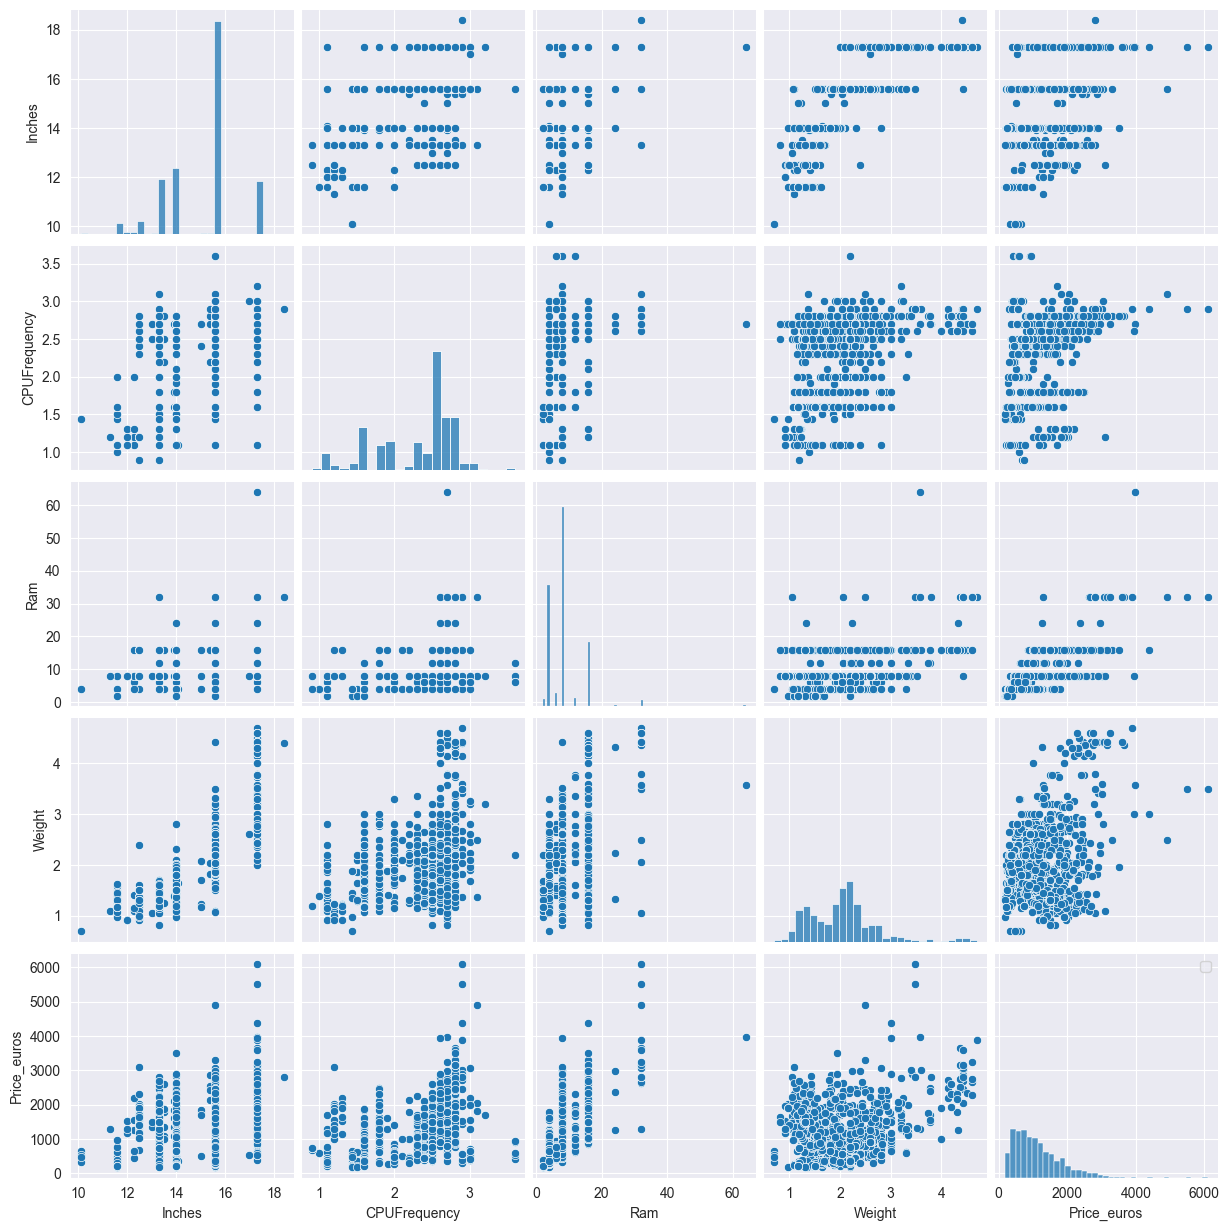

In [70]:
sns.pairplot(data, diag_kind='hist')
plt.legend()

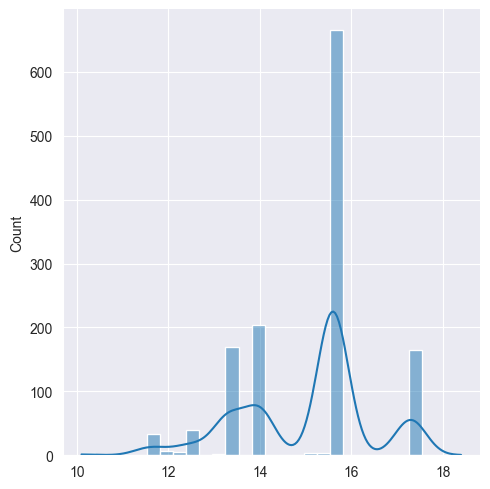

In [71]:
sns.displot(data['Inches'].values, kde=True)

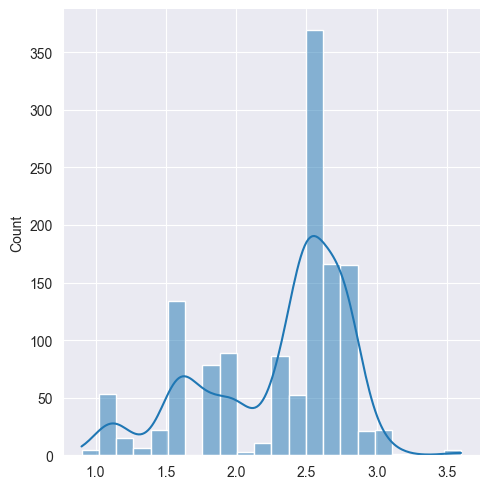

In [72]:
sns.displot(data["CPUFrequency"].values, kde=True)

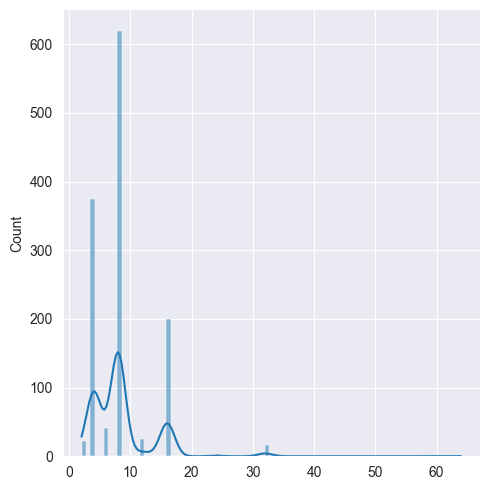

In [73]:
sns.displot(data["Ram"].values, kde=True)

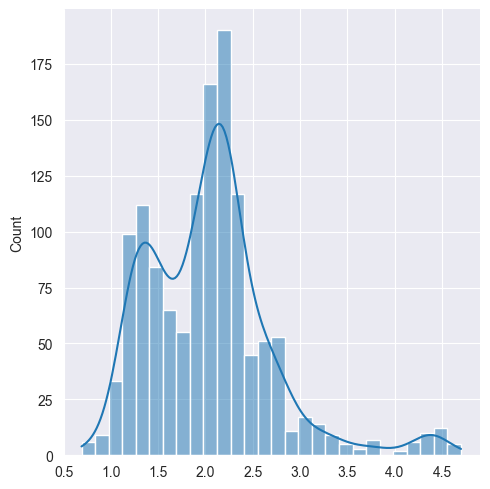

In [74]:
sns.displot(data["Weight"].values, kde=True)

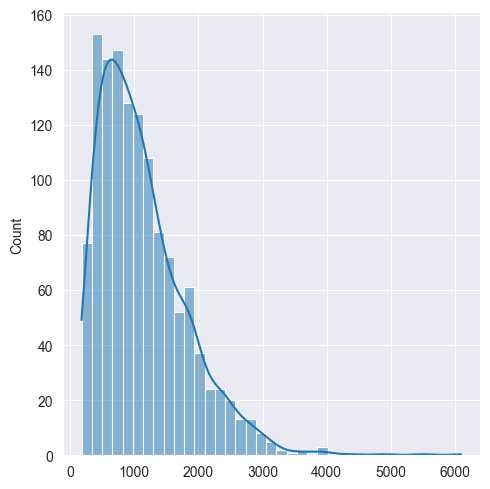

In [75]:
sns.displot(data["Price_euros"].values, kde=True)

Исходя из графиков, можно сказать, что все значения числовых величин находятся в пределах допустимых значений, выбросов по каждой отдельной характеристики нет.

<AxesSubplot: >

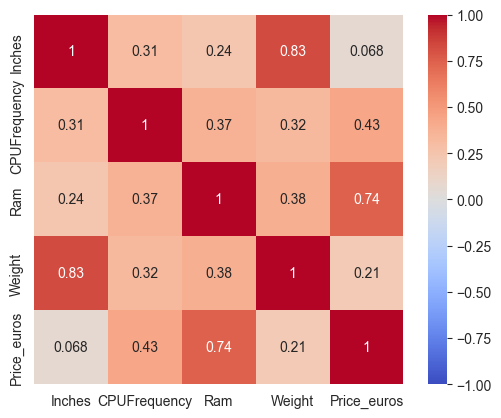

In [76]:
corr_mat = data.corr(numeric_only=True)
sns.heatmap(corr_mat, vmin=-1,vmax=1, square=True, cmap='coolwarm', annot=True)

По матрице корреляции видно, что величины `Inches`/`Weight` и `Ram`/`Price_euros` достаточно сильно коррелируют. Корреляция `Ram`/`Price_euros` для нас полезна, а вот в `Inches`/`Weight`, в принципе, от одного из признаков можно и отказаться (но мы этого пока делать не будем). 

Теперь визуализируем качественные признаки

<AxesSubplot: xlabel='TypeName', ylabel='count'>

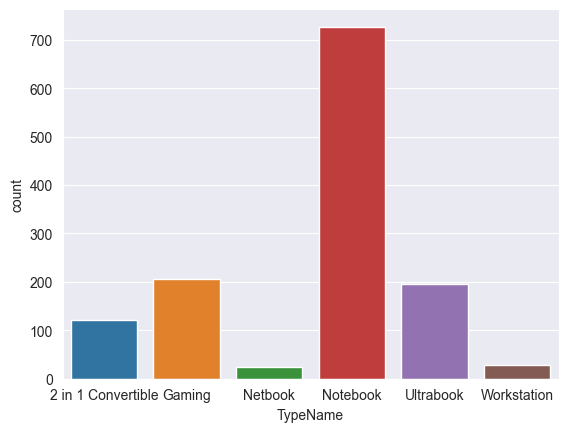

In [77]:
sns.countplot(data=data, x="TypeName")

Text(0.5, 0, 'OpSys')

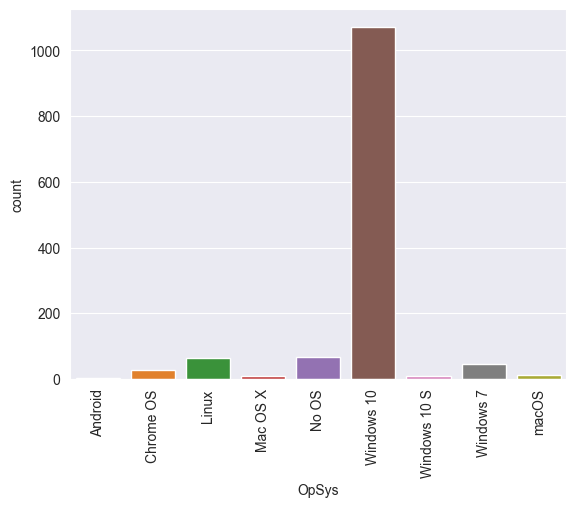

In [78]:
sns.countplot(data=data, x="OpSys")
plt.xticks(rotation=90)
plt.xlabel("OpSys", fontsize= 10)

Text(0.5, 0, 'OpSys')

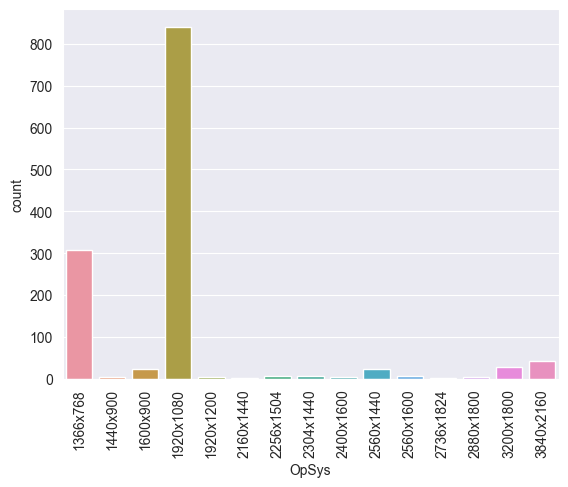

In [79]:
sns.countplot(data=data, x="ScreenResolution")
plt.xticks(rotation=90)
plt.xlabel("OpSys", fontsize= 10)

<AxesSubplot: xlabel='CPUVendor', ylabel='count'>

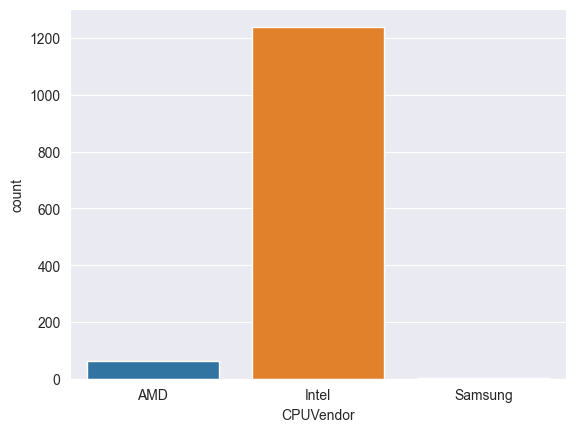

In [80]:
sns.countplot(data=data, x="CPUVendor")

<AxesSubplot: xlabel='GPUVendor', ylabel='count'>

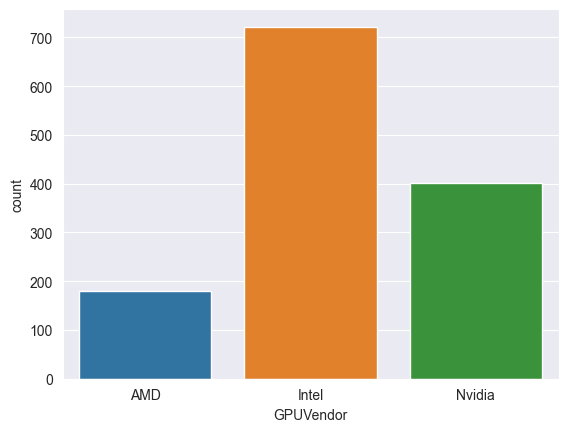

In [81]:
sns.countplot(data=data, x="GPUVendor")

### Предобработка данных

Категориальные признаки с более чем 2-мя значениями векторизуем.

In [82]:
non_binary_categorial_col = ['Company', 'TypeName', 'ScreenResolution', 'Memory', 'Gpu', 'OpSys', 'CPUVendor', 'GPUVendor']
data = data.merge(right=pd.get_dummies(data[non_binary_categorial_col]), left_index=True, right_index=True)
data = data.drop(columns=non_binary_categorial_col)

Категорильные признаки с друмя уникальными значениями биноризуем.

In [83]:
binary_categorial_col = ["SSD", "HDD", "SSHD", "FlashStorage", "Touchscreen", "IPS"]

for col in binary_categorial_col:
    le = LabelEncoder()
    le.fit(data[col])
    data[col] = le.transform(data[col]).astype("uint8")

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 204 entries, Inches to GPUVendor_Nvidia
dtypes: float64(5), uint8(199)
memory usage: 304.2 KB


In [85]:
data.describe(include="all")

,Inches,CPUFrequency,Ram,Weight,Price_euros,IPS,Touchscreen,SSD,HDD,SSHD,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,CPUVendor_AMD,CPUVendor_Intel,CPUVendor_Samsung,GPUVendor_AMD,GPUVendor_Intel,GPUVendor_Nvidia
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.00000,...,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,2.298772,8.382195,2.038734,1123.686992,0.280123,0.147352,0.646969,0.442057,0.00921,...,0.822717,0.006140,0.034536,0.009977,0.047583,0.951650,0.000767,0.138143,0.554106,0.307751
std,1.426304,0.506340,5.084665,0.665475,699.009043,0.449231,0.354593,0.478096,0.496822,0.09556,...,0.382055,0.078145,0.182671,0.099423,0.212963,0.214587,0.027703,0.345182,0.497255,0.461740
min,10.100000,0.900000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,2.000000,4.000000,1.500000,599.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,15.600000,2.500000,8.000000,2.040000,977.000000,0.000000,0.000000,1.000000,0.000000,0.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,15.600000,2.700000,8.000000,2.300000,1487.880000,1.000000,0.000000,1.000000,1.000000,0.00000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,18.400000,3.600000,64.000000,4.700000,6099.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разобьем датасет на обучающие и целевые признаки.

In [86]:
X = data.drop(columns="Price_euros")
y = data.Price_euros

Разобьем датасет на обучающую и тестовую выборки.

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

Теперь нормализуем изначальные числовые признаки, не боясь утечки данных из test в train.

In [88]:
numeric_col = ["Inches", "Weight", "Ram", "CPUFrequency"]

data_numerical = X_train[numeric_col]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
X_train[numeric_col] = data_numerical

data_numerical = X_test[numeric_col]
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
X_test[numeric_col] = data_numerical

## Обучение моделей

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error


def get_score_info(clf, X_train, X_test, y_train, y_test):

    y_train_prediction = clf.predict(X_train)
    y_test_prediction = clf.predict(X_test)

    compare = pd.DataFrame({
        "Prediction": list(y_test_prediction),
        "GroundTruth": list(y_test)
    })
    print(f"Пример предсказания на test:\n{compare.head()}\n")

    print(
        f'MAE на обучающей выборке: {mean_absolute_error(y_train, y_train_prediction)}'
    )
    print(
        f'MAE на тестовой выборке: {mean_absolute_error(y_test, y_test_prediction)}'
    )

    print(
        f'MSE на обучающей выборке: {mean_squared_error(y_train, y_train_prediction)}'
    )
    print(
        f'MSE на тестовой выборке: {mean_squared_error(y_test, y_test_prediction)}'
    )

    print(
        f'MAXError на обучающей выборке: {max_error(y_train, y_train_prediction)}'
    )
    print(
        f'MAXError на тестовой выборке: {max_error(y_test, y_test_prediction)}'
    )


### KNN

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

parametrs = {"n_neighbors":range(1, 5)}
neighbor_regressor = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=neighbor_regressor, param_grid=parametrs, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 5)},
             scoring='neg_mean_absolute_error')

In [91]:
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

get_score_info(best_reg, X_train, X_test, y_train, y_test)

Пример предсказания на test:
   Prediction  GroundTruth
0     1209.54      1607.96
1     1904.50       998.00
2     1006.50       869.01
3     1016.75       945.00
4      973.00       949.00

MAE на обучающей выборке: 160.17896655701753
MAE на тестовой выборке: 185.11109974424554
MSE на обучающей выборке: 62592.19497223821
MSE на тестовой выборке: 76747.62344309462
MAXError на обучающей выборке: 1964.8999999999996
MAXError на тестовой выборке: 1479.5


### Decision tree

In [92]:
from sklearn.tree import DecisionTreeRegressor

parametrs = {"max_depth":range(3, 10)}
tree_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=tree_reg, param_grid=parametrs, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 10)},
             scoring='neg_mean_absolute_error')

In [93]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

get_score_info(best_clf, X_train, X_test, y_train, y_test)

Пример предсказания на test:
    Prediction  GroundTruth
0  1611.244225      1607.96
1  2215.112222       998.00
2   783.601667       869.01
3  1084.758800       945.00
4   977.134839       949.00

MAE на обучающей выборке: 146.9443189518926
MAE на тестовой выборке: 232.57193924273378
MSE на обучающей выборке: 46891.641434762074
MSE на тестовой выборке: 134868.07919449886
MAXError на обучающей выборке: 1018.5812000000003
MAXError на тестовой выборке: 2370.0


### Random forest

In [94]:
from sklearn.ensemble import RandomForestRegressor

parametrs = {"n_estimators":range(10, 200, 50), "max_depth":range(3, 10)}
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(estimator=forest_reg, param_grid=parametrs, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(3, 10),
                         'n_estimators': range(10, 200, 50)},
             scoring='neg_mean_absolute_error')

In [95]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

get_score_info(best_clf, X_train, X_test, y_train, y_test)

Пример предсказания на test:
    Prediction  GroundTruth
0  1672.430826      1607.96
1  1759.307290       998.00
2   923.284135       869.01
3   964.779524       945.00
4   961.853687       949.00

MAE на обучающей выборке: 127.89791716768849
MAE на тестовой выборке: 185.87031163322305
MSE на обучающей выборке: 33279.4212365879
MSE на тестовой выборке: 78366.53177634077
MAXError на обучающей выборке: 925.3237235762344
MAXError на тестовой выборке: 2020.17038396729


### Linear regression

In [96]:
from sklearn.linear_model import LinearRegression

parametrs = {"fit_intercept": (True, False)}
lin_reg = LinearRegression()

grid_search = GridSearchCV(estimator=lin_reg, param_grid=parametrs, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': (True, False)},
             scoring='neg_mean_absolute_error')

In [97]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

get_score_info(best_clf, X_train, X_test, y_train, y_test)

Пример предсказания на test:
     Prediction  GroundTruth
0  1.288338e+14      1607.96
1  1.038750e+03       998.00
2  1.172250e+03       869.01
3  1.008250e+03       945.00
4  8.325000e+02       949.00

MAE на обучающей выборке: 165.60362938596492
MAE на тестовой выборке: 2572824417274.145
MSE на обучающей выборке: 51514.611144188595
MSE на тестовой выборке: 2.9527350455454016e+26
MAXError на обучающей выборке: 1234.5
MAXError на тестовой выборке: 229063304264896.5


Линейная регрессия показывает себя в этой задаче не лучшим образом. Если на обучающей выборке метрики можно назвать "приемлемыми", то на тестовой выборке модель выдает абсолютно нерелевантные значения для некоторых моделей (как в случае с моделью ноутбука под индексом 0).

### MLP Regressor

In [98]:
from sklearn.neural_network import MLPRegressor

alpha_arr = np.logspace(-3, 2, 20)

train_mse = []
test_mse = []

for alpha in alpha_arr:
    mlp_model = MLPRegressor(alpha=alpha,
                              hidden_layer_sizes=(100, ),
                              solver='adam',
                              activation='relu',
                              max_iter=1500,
                              random_state=7
                              )
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

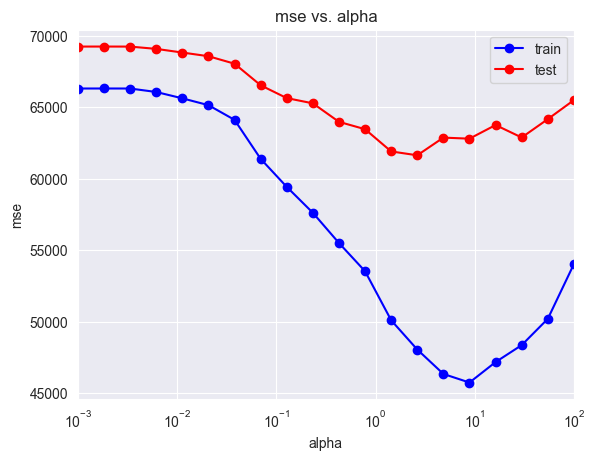

In [99]:
plt.semilogx(alpha_arr, train_mse, 'b-o', label="train")
plt.semilogx(alpha_arr, test_mse, 'r-o', label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('mse vs. alpha')
plt.xlabel('alpha')
plt.ylabel('mse')
plt.legend()

In [100]:
parametrs = {"alpha":np.logspace(-3, 2, 20)}
mlp_classifier = MLPRegressor(hidden_layer_sizes=(100, ), solver='adam', activation='relu', max_iter=1500, random_state=7)

grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=parametrs, scoring="neg_mean_absolute_error", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=1500, random_state=7),
             n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02])},
             scoring='neg_mean_absolute_error')

In [101]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

get_score_info(best_clf, X_train, X_test, y_train, y_test)

Пример предсказания на test:
    Prediction  GroundTruth
0  1682.591667      1607.96
1  1162.340208       998.00
2  1141.571872       869.01
3  1094.838835       945.00
4   878.569749       949.00

MAE на обучающей выборке: 150.5872636118509
MAE на тестовой выборке: 179.35133823073036
MSE на обучающей выборке: 47171.947753082655
MSE на тестовой выборке: 63747.127010355995
MAXError на обучающей выборке: 1164.7567991189212
MAXError на тестовой выборке: 1141.0922882019777


При оптимизации параметров моделей за основную метрику бралось MAE. Лучший результат по данной метрики удалось получить с помощью MLP Regressor и KNN.
К сожалению, средняя ошибка в ~ 180 евро на достаточно недорогом товаре (это, все-таки, не машина и не квартира) не позволяет назвать получившиеся модели хорошими. Да и другие метрики, такие как MAXError и MSE говорят нам о том же.